<a href="https://www.kaggle.com/code/liangchanglac/eda-on-decisions-of-strategic-uncertainty?scriptVersionId=130235874" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Introduction**
* The analysis aims to understand how dispositional affect and social preference are associated with actual trust and altruistic behavior.

The dataset includes the following:

* Incentivized decisions in the trust game and dictator game, which serve as proxies for trust level and altruism, respectively.
* People's perceived social distance to the agents depicted in different betrayal scenarios.
* People's emotional response and social cognition towards different betrayal scenarios.
* People's perceived social distance to their anonymous counterparts they encountered during the economic games.
* More details can be checked on this OSF link https://osf.io/27t6b 



As a first step, this notebook provides a quick exploration and overview of how the dataset looks like. 


**Trust is the willingness to be vulnerable.



![](https://i.kym-cdn.com/entries/icons/original/000/014/737/07_trust-fall.gif)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

# Reset rcParams to default values
mpl.rcParams.update()
# globally setting seaborn
sns.set(style='ticks', palette='muted', font_scale=1.2, context='notebook')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['font.size'] = 10

dirname = "/kaggle/input/economic-games-ba/"

sl_all_avg = pd.read_csv(dirname + "sl_all_avg.csv")
sl_both75_avg = pd.read_csv(dirname + "sl_both75_avg.csv")
sl_both75_unfold = pd.read_csv(dirname + "sl_both75_unfold.csv")
sl_dg75_avg = pd.read_csv(dirname +"sl_dg75_avg.csv")
sl_dg75_unfold= pd.read_csv(dirname + "sl_dg75_unfold.csv")
sl_tg75_avg = pd.read_csv(dirname + "sl_tg75_avg.csv")
sl_tg75_unfold = pd.read_csv(dirname + "sl_tg75_unfold.csv")



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


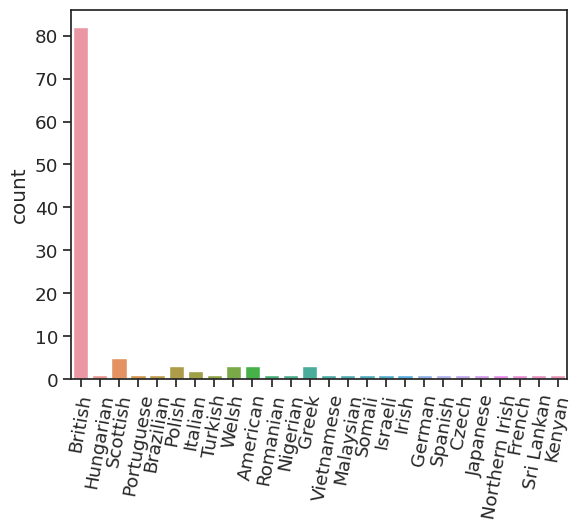

In [2]:
# sample from different regions
areas = list(sl_all_avg["Nationality"])
sns.countplot(x = areas)
plt.xticks(rotation = 80)
plt.show()

4.55
6.183333333333334


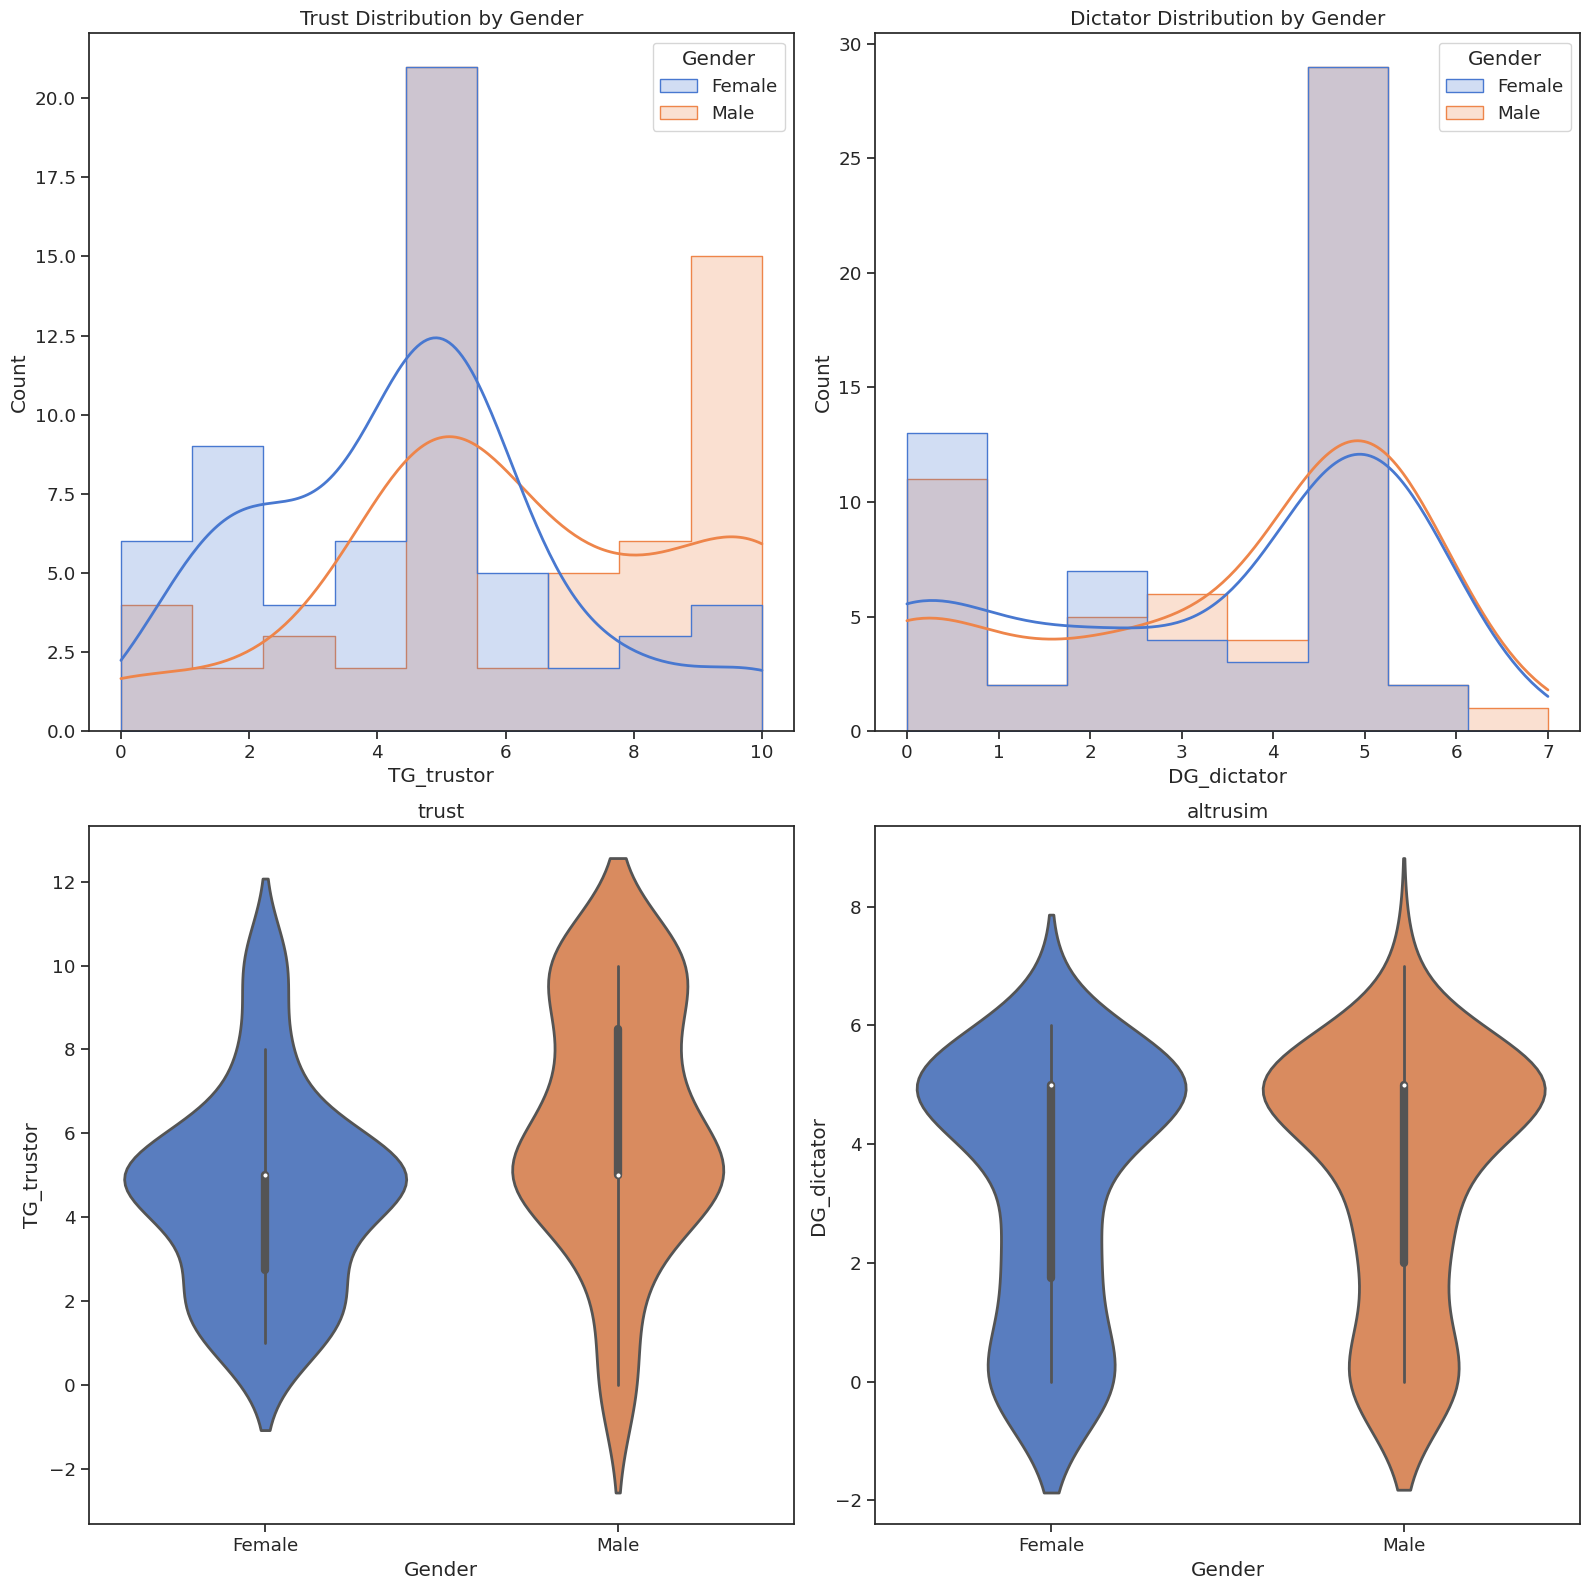

amin                   amax  \
                                          DG_dictator TG_trustor DG_dictator   
Gender educationClustered incomeClustered                                      
Female 1                  1                         0          5           5   
       2                  1                         0          1           6   
                          2                         0          1           5   
                          3                         5          6           5   
       3                  1                         0          1           5   
                          2                         5          2           5   
                          3                         5          3           5   
Male   1                  1                         0          2           6   
       2                  1                         0          0           7   
                          2                         0          5           5   
                          3                         5          7           5   
       3                  1                         0          0           5   
                          2                         1          0           5   
                          3                         5          8           5   

                                                            mean             \
                                          TG_trustor DG_dictator TG_trustor   
Gender educationClustered incomeClustered                                     
Female 1                  1                        7    2.200000   5.600000   
       2                  1                       10    3.600000   4.766667   
                          2                       10    2.333333   4.500000   
                          3                        6    5.000000   6.000000   
       3                  1                        8    2.785714   3.571429   
                          2                       10    5.000000   5.333333   
                          3                        3    5.000000   3.000000   
Male   1                  1                       10    3.750000   6.125000   
       2                  1                       10    3.208333   5.791667   
                          2                       10    3.600000   6.900000   
                          3                        7    5.000000   7.000000   
       3                  1                       10    3.625000   6.500000   
                          2                       10    3.500000   5.875000   
                          3                        8    5.000000   8.000000   

                                               median             
                                          DG_dictator TG_trustor  
Gender educationClustered incomeClustered                         
Female 1                  1                       2.0        5.0  
       2                  1                       5.0        5.0  
                          2                       2.0        4.5  
                          3                       5.0        6.0  
       3                  1                       3.0        3.5  
                          2                       5.0        4.0  
                          3                       5.0        3.0  
Male   1                  1                       4.5        5.5  
       2                  1                       4.0        5.0  
                          2                       5.0        6.0  
                          3                       5.0        7.0  
       3                  1                       5.0        8.0  
                          2                       4.0        5.5  
                          3                       5.0        8.0

In [3]:
female_tg_mean = sl_all_avg[sl_all_avg["Gender"] == "Female"]["TG_trustor"].mean()
male_tg_mean = sl_all_avg[sl_all_avg["Gender"] == "Male"]["TG_trustor"].mean()
print(female_tg_mean)
print(male_tg_mean)

# Create subplots
fig, axs = plt.subplots(2,2, figsize=(16, 16))

# decisions distributions in trust game by gender
sns.histplot(data=sl_all_avg, x="TG_trustor", hue="Gender", element="step", kde=True, ax=axs[0,0])
axs[0, 0].set_title("Trust Distribution by Gender")

# decisions distributions in dictator game by gender
sns.histplot(data=sl_all_avg, x="DG_dictator", hue="Gender", element="step", kde=True, ax=axs[0,1])
axs[0,1].set_title("Dictator Distribution by Gender")

# violin plot for trust 
sns.violinplot(data=sl_all_avg, y="TG_trustor", x="Gender", ax=axs[1,0])
axs[1,0].set_title("trust")

# violin plot for altruism
sns.violinplot(data=sl_all_avg, y="DG_dictator", x="Gender", ax=axs[1,1])
axs[1,1].set_title("altrusim")
plt.tight_layout()
plt.show()

# pivot table
sl_all_avg.pivot_table(values=["TG_trustor", "DG_dictator"], index= ["Gender", "educationClustered", 'incomeClustered'], aggfunc = [np.min, np.max, np.mean, np.median])

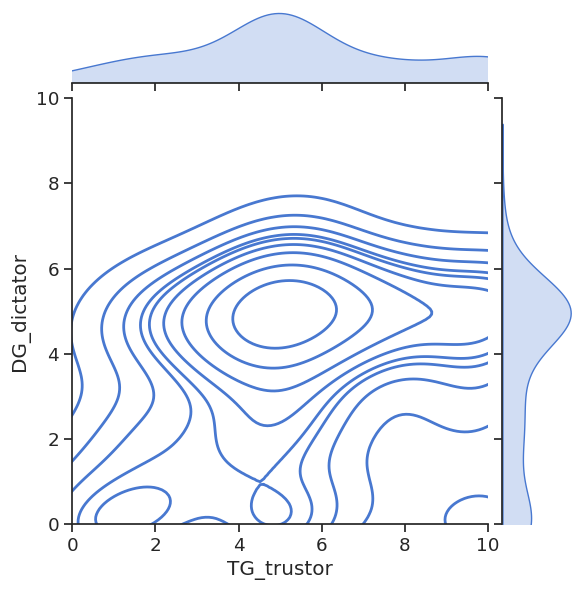

In [4]:
# check association between trust and altruistic behaviour
g = sns.JointGrid(data=sl_all_avg, x='TG_trustor', y='DG_dictator')
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, fill = True)
g.ax_joint.set_xlim(0, 10)
g.ax_joint.set_ylim(0, 10)
plt.show()



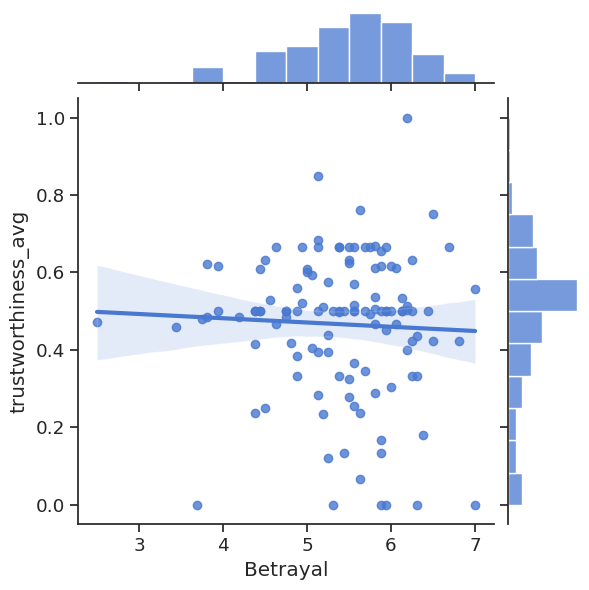

In [5]:
# check associaitons between mean betrayal sensitivty across betrayal scenarios and incentivized trustworthiness
g = sns.JointGrid(data=sl_all_avg, x='Betrayal', y='trustworthiness_avg')
g.plot(sns.regplot, sns.histplot)
plt.show()

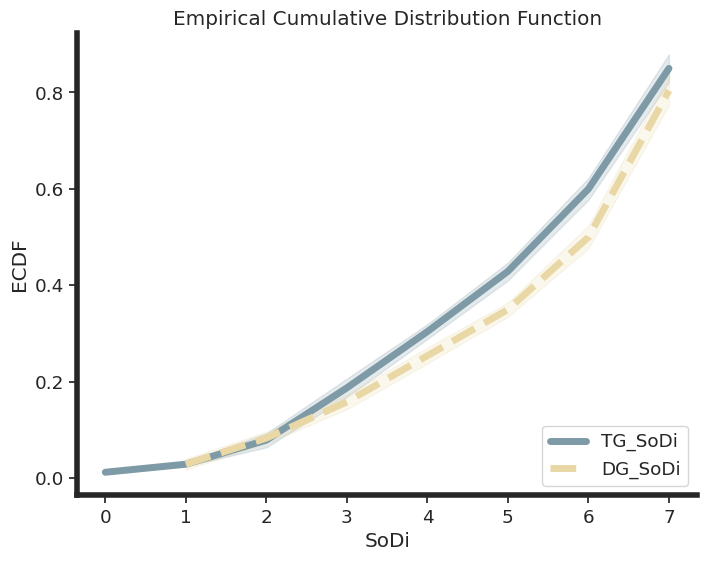

In [6]:
import seaborn as sns

# Define the Morandi-inspired colors
morandi_colors = ['#B3B3B3', '#7D9AA6', '#E9D8A6', '#BF9005']

# Compute the ECDFs of TG_SoDi and DG_SoDi
ecdf_tg = ECDF(sl_all_avg['TG_SoDi'])
ecdf_dg = ECDF(sl_all_avg['DG_SoDi'])

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the CDFs with different colors and legends
sns.lineplot(x=ecdf_tg.x, y=ecdf_tg.y, color=morandi_colors[1], linewidth=5, label='TG_SoDi')
sns.lineplot(x=ecdf_dg.x, y=ecdf_dg.y, color=morandi_colors[2], linewidth=5, linestyle='dashed', label='DG_SoDi')

# Set the axis labels and legend
ax.set_xlabel('SoDi')
ax.set_ylabel('ECDF')
ax.legend(loc='lower right')

# Set the plot title
plt.title('Empirical Cumulative Distribution Function')

# Make all lines and layout thicker
sns.despine()
for spine in ax.spines.values():
    spine.set_linewidth(4)
# Show the plot
plt.show()


**It is very interesting to see that people with wishful thinking feel they are closer to their counterparts in the trust game than in the dictator game, even though they are all strangers from the same pool. **